#importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [3]:
df=pd.read_excel('City Power Consumption.xlsx')

In [4]:
df.head()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


In [5]:
df.describe()

,S no,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
count,52583.000000,52512.000000,52275.000000,52568.000000,52565.000000,52583.000000,52583.000000
mean,26292.000000,1.955320,182.964247,74.872330,154.499191,0.009338,31061.821779
std,15179.548939,2.347914,264.571351,124.084858,2.871553,0.096180,8021.057455
min,1.000000,0.050000,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,13146.500000,0.078000,0.062000,0.122000,152.000000,0.000000,24738.858990
50%,26292.000000,0.086000,5.226000,4.412000,155.000000,0.000000,31189.787230
75%,39437.500000,4.915000,320.100000,100.500000,157.000000,0.000000,36721.582445
max,52583.000000,6.483000,1163.000000,936.000000,159.000000,1.000000,52204.395120


In [6]:
# dropping s no as this is not having a pattern and it is unique

df.drop(columns=['S no'],axis=1,inplace=True)

# Checking data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Temperature                   52263 non-null  object 
 1   Humidity                      52558 non-null  object 
 2   Wind Speed                    52512 non-null  float64
 3   general diffuse flows         52275 non-null  float64
 4   diffuse flows                 52568 non-null  float64
 5   Air Quality Index (PM)        52565 non-null  float64
 6   Cloudiness                    52583 non-null  int64  
 7    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.2+ MB


In [8]:
df.columns.tolist()

['Temperature',
 'Humidity',
 'Wind Speed',
 'general diffuse flows',
 'diffuse flows',
 'Air Quality Index (PM)',
 'Cloudiness',
 ' Power Consumption in A Zone']

# Removing extra spaces from leading and trailing spaces

In [9]:
df.columns=df.columns.str.strip()

In [10]:
df.columns.tolist()

['Temperature',
 'Humidity',
 'Wind Speed',
 'general diffuse flows',
 'diffuse flows',
 'Air Quality Index (PM)',
 'Cloudiness',
 'Power Consumption in A Zone']

# Checking null value count and %

In [11]:
df.isnull().sum()
# in count

Temperature                    320
Humidity                        25
Wind Speed                      71
general diffuse flows          308
diffuse flows                   15
Air Quality Index (PM)          18
Cloudiness                       0
Power Consumption in A Zone      0
dtype: int64

In [12]:
df.isnull().mean()*100
# in %

Temperature                    0.608562
Humidity                       0.047544
Wind Speed                     0.135025
general diffuse flows          0.585741
diffuse flows                  0.028526
Air Quality Index (PM)         0.034232
Cloudiness                     0.000000
Power Consumption in A Zone    0.000000
dtype: float64

In [13]:
df.describe()

,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
count,52512.000000,52275.000000,52568.000000,52565.000000,52583.000000,52583.000000
mean,1.955320,182.964247,74.872330,154.499191,0.009338,31061.821779
std,2.347914,264.571351,124.084858,2.871553,0.096180,8021.057455
min,0.050000,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,0.078000,0.062000,0.122000,152.000000,0.000000,24738.858990
50%,0.086000,5.226000,4.412000,155.000000,0.000000,31189.787230
75%,4.915000,320.100000,100.500000,157.000000,0.000000,36721.582445
max,6.483000,1163.000000,936.000000,159.000000,1.000000,52204.395120


# Checking data types

In [14]:
df.dtypes

Temperature                     object
Humidity                        object
Wind Speed                     float64
general diffuse flows          float64
diffuse flows                  float64
Air Quality Index (PM)         float64
Cloudiness                       int64
Power Consumption in A Zone    float64
dtype: object

# Data Transformation: converting object to str then removing alphabets and to float

In [15]:
df['Temperature']=df['Temperature'].astype('str')
df['Temperature']=df['Temperature'].str.extract(r'([-+]?[0-9]*\.?[0-9]+)')
df['Temperature']=df['Temperature'].astype('float64')


# As we got to know we have str values in temperature folder,
# first we need remove str value in every cell of temperature as this is not clean data

In [16]:
# so the data temp is having small amount of missing values we will update that with median values
# In this case we need to check with client and our leads what can be done

In [17]:
df['Temperature']=df['Temperature'].fillna(df['Temperature'].median())

In [18]:
df['Humidity']=df['Humidity'].astype('str')
df['Humidity']=df['Humidity'].str.extract(r'([-+]?[0-9]*\.?[0-9]+)')
df['Humidity']=df['Humidity'].astype('float64')

In [19]:
df['Humidity']=df['Humidity'].fillna(df['Humidity'].median())

In [20]:
df['Wind Speed']=df['Wind Speed'].fillna(df['Wind Speed'].median())
df['general diffuse flows']=df['general diffuse flows'].fillna(df['general diffuse flows'].median())
df['diffuse flows']=df['diffuse flows'].fillna(df['diffuse flows'].median())
df['Air Quality Index (PM)']=df['Air Quality Index (PM)'].fillna(df['Air Quality Index (PM)'].median())

<Axes: >

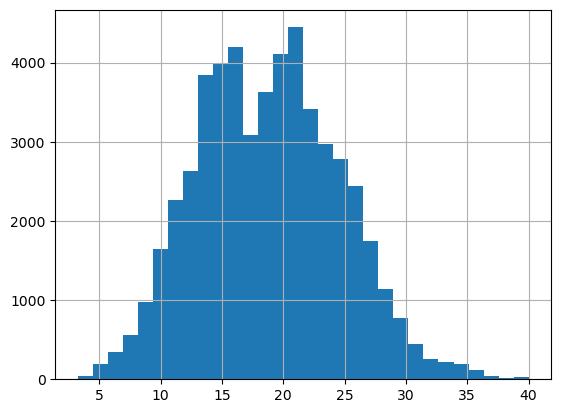

In [21]:
df['Temperature'].hist(bins=30)

# looks normally distributed

<Axes: ylabel='Temperature'>

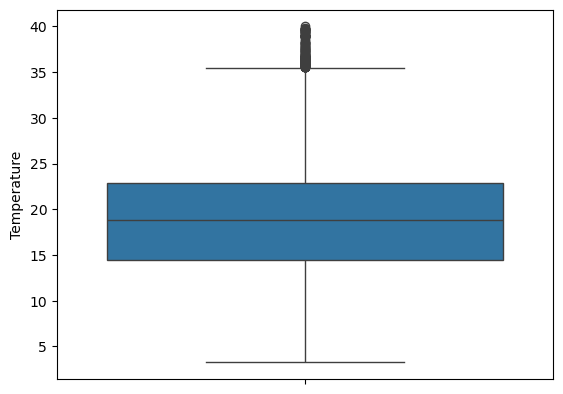

In [22]:
import seaborn as sns

sns.boxplot(df['Temperature'])

<Axes: xlabel='Temperature', ylabel='Power Consumption in A Zone'>

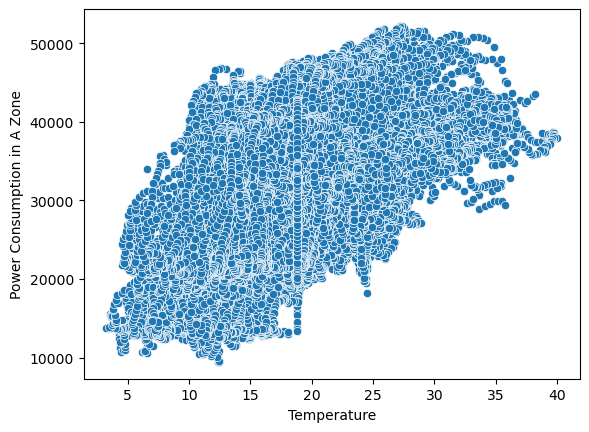

In [23]:

sns.scatterplot(x=df['Temperature'],y=df['Power Consumption in A Zone'])

# Assigning feature data to x and target to y

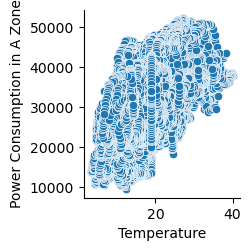

In [24]:
sns.pairplot(data=df,x_vars='Temperature',
    y_vars='Power Consumption in A Zone',
    kind='scatter')

In [25]:
df.corr()['Power Consumption in A Zone']


Temperature                    0.558778
Humidity                      -0.230259
Wind Speed                     0.207191
general diffuse flows          0.209634
diffuse flows                  0.062676
Air Quality Index (PM)        -0.001137
Cloudiness                    -0.120694
Power Consumption in A Zone    1.000000
Name: Power Consumption in A Zone, dtype: float64

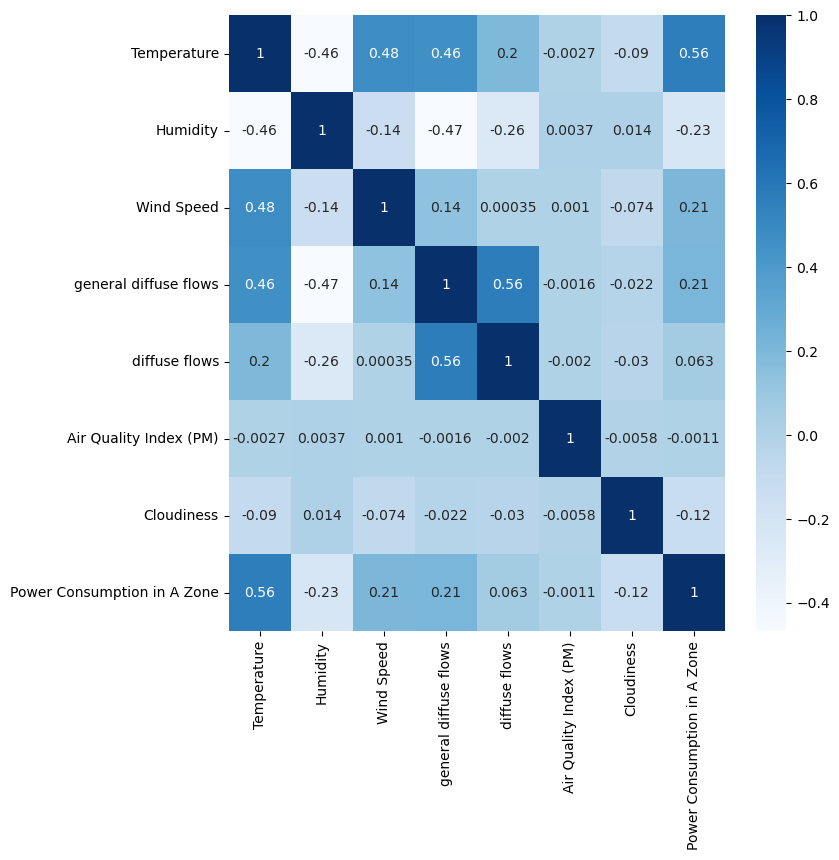

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [27]:
df['Cloudiness'].value_counts()

Cloudiness
0    52092
1      491
Name: count, dtype: int64

In [28]:
df.isnull().sum()

Temperature                    0
Humidity                       0
Wind Speed                     0
general diffuse flows          0
diffuse flows                  0
Air Quality Index (PM)         0
Cloudiness                     0
Power Consumption in A Zone    0
dtype: int64

In [29]:
q1=df['Temperature'].quantile(0.25)
q3=df['Temperature'].quantile(0.75)
IQR=q3-q1

lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR

outliers=df[(df['Temperature']<lower_bound) | (df['Temperature']>upper_bound)]


print(len(outliers))
print(outliers)

# outliers are checked by IQR as well and this we should check with our leads and clients on the same
# whether they are valid outliers or not

154
       Temperature  Humidity  Wind Speed  general diffuse flows  \
27000        35.78     27.88       4.921                  841.0   
27001        36.21     26.75       4.923                  850.0   
27002        36.37     26.71       4.922                  855.0   
27003        36.69     26.52       4.920                  860.0   
27004        36.59     31.89       4.925                  862.0   
...            ...       ...         ...                    ...   
32058        35.66     21.81       4.902                  723.0   
32059        35.64     21.94       4.905                  706.0   
32070        35.61     19.04       4.908                  446.5   
32071        35.58     18.71       4.906                  427.9   
32072        35.55     18.37       4.905                  364.6   

       diffuse flows  Air Quality Index (PM)  Cloudiness  \
27000           94.4                   158.0           0   
27001           94.7                   159.0           0   
27002      

In [30]:
q1=df['Humidity'].quantile(0.25)
q3=df['Humidity'].quantile(0.75)
IQR=q3-q1

lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR

outliers=df[(df['Humidity']<lower_bound) | (df['Humidity']>upper_bound)]


print(len(outliers))
print(outliers)

# outliers are checked by IQR as well and this we should check with our leads and clients on the same
# whether they are valid outliers or not

295
       Temperature  Humidity  Wind Speed  general diffuse flows  \
17968        25.27     23.52       4.920                  207.3   
17969        25.20     23.66       4.918                  173.9   
19088        31.71     21.96       0.070                  863.0   
19089        31.73     20.92       0.073                  856.0   
19090        31.94     20.62       2.745                  853.0   
...            ...       ...         ...                    ...   
38116        31.06     14.80       4.934                  407.7   
38117        30.84     19.21       4.929                  369.3   
38118        30.44     20.21       4.945                  347.0   
38119        30.09     21.64       4.943                  338.3   
38120        29.76     22.61       4.965                  309.8   

       diffuse flows  Air Quality Index (PM)  Cloudiness  \
17968          230.7                   152.0           0   
17969          194.8                   159.0           0   
19088      

In [31]:
q1=df['general diffuse flows'].quantile(0.25)
q3=df['general diffuse flows'].quantile(0.75)
IQR=q3-q1

lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR

outliers=df[(df['general diffuse flows']<lower_bound) | (df['general diffuse flows']>upper_bound)]


print(len(outliers))
print(len(df['general diffuse flows']))
print(len(outliers)/len(df['general diffuse flows'])*100)

# outliers are checked by IQR as well and this we should check with our leads and clients on the same
# whether they are valid outliers or not

2425
52583
4.611756651389232


In [32]:
q1=df['diffuse flows'].quantile(0.25)
q3=df['diffuse flows'].quantile(0.75)
IQR=q3-q1

lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR

outliers=df[(df['diffuse flows']<lower_bound) | (df['diffuse flows']>upper_bound)]


print(len(outliers))
print(len(df['diffuse flows']))
print(len(outliers)/len(df['diffuse flows'])*100)
# outliers are checked by IQR as well and this we should check with our leads and clients on the same
# whether they are valid outliers or not

4621
52583
8.788011334461707


In [33]:
q1=df['Wind Speed'].quantile(0.25)
q3=df['Wind Speed'].quantile(0.75)
IQR=q3-q1

lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR

outliers=df[(df['Wind Speed']<lower_bound) | (df['Wind Speed']>upper_bound)]


print(len(outliers))
print(len(outliers)/len(df['Wind Speed'])*100)

# outliers are checked by IQR as well and this we should check with our leads and clients on the same
# whether they are valid outliers or not

0
0.0


In [34]:
q1=df['Air Quality Index (PM)'].quantile(0.25)
q3=df['Air Quality Index (PM)'].quantile(0.75)
IQR=q3-q1

lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR

outliers=df[(df['Air Quality Index (PM)']<lower_bound) | (df['Air Quality Index (PM)']>upper_bound)]


print(len(outliers))
print(len(outliers)/len(df['Air Quality Index (PM)']))

# outliers are checked by IQR as well and this we should check with our leads and clients on the same
# whether they are valid outliers or not

0
0.0


In [35]:
df.isnull().sum()

Temperature                    0
Humidity                       0
Wind Speed                     0
general diffuse flows          0
diffuse flows                  0
Air Quality Index (PM)         0
Cloudiness                     0
Power Consumption in A Zone    0
dtype: int64

In [36]:
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,6.121,75.0,0.083,0.091,0.096,151.0,1,28228.86076
4,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


<Axes: xlabel='Power Consumption in A Zone', ylabel='Count'>

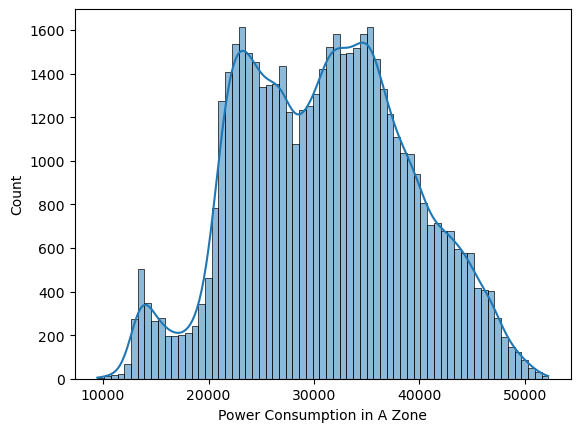

In [37]:
sns.histplot(df['Power Consumption in A Zone'],kde=True)

In [38]:
df['Power Consumption in A Zone'].skew()


# skewness is shwoing normal distribution of data, we will use standard scaler

0.031527861541815555

# Splitting Data as features and target 

In [39]:
x=df.drop(columns='Power Consumption in A Zone')

In [40]:
y=df['Power Consumption in A Zone']

In [41]:
x.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness
0,6.559,73.8,0.083,0.051,0.119,158.0,1
1,6.414,74.5,0.083,0.070,0.085,159.0,1
2,6.313,74.5,0.080,0.062,0.100,151.0,1
3,6.121,75.0,0.083,0.091,0.096,151.0,1
4,5.921,75.7,0.081,0.048,0.085,154.0,1


In [42]:
y.head()

0    34055.69620
1    29814.68354
2    29128.10127
3    28228.86076
4    27335.69620
Name: Power Consumption in A Zone, dtype: float64

# Splitting Data for training and testing

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [44]:
print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)


x_train:  (42066, 7)
x_test:  (10517, 7)
y_train:  (42066,)
y_test:  (10517,)


# Scaling data

In [45]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# as data in normally distributes


## checking multicollinearity 

In [46]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
x = x.select_dtypes(include=['float64', 'int64'])
X_const = add_constant(x)

# Step 5: Compute VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_data)


                  Feature          VIF
0                   const  2955.551998
1             Temperature     1.811346
2                Humidity     1.426275
3              Wind Speed     1.320208
4   general diffuse flows     1.948814
5           diffuse flows     1.487075
6  Air Quality Index (PM)     1.000058
7              Cloudiness     1.011360


# Training multiple models amd testing them

### 1. Linear Regression

In [172]:
from sklearn.linear_model import LinearRegression

rr=LinearRegression()

rr.fit(x_train,y_train)
y_pred=rr.predict(x_test)

from sklearn.metrics import r2_score

r2_score(y_test,y_pred)


0.33102894433759356

In [173]:
y_pred_tra=rr.predict(x_train)
r2_score(y_train,y_pred_tra)

0.32555149864705046

### 3 Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

rr=DecisionTreeRegressor()

rr.fit(x_train,y_train)
y_pred=rr.predict(x_test)

from sklearn.metrics import accuracy_score, r2_score
print(r2_score(y_test,y_pred))
y_pred_tra=rr.predict(x_train)
print(r2_score(y_train,y_pred_tra))


0.27258330859694047
0.9998845919339645


In [ ]:
df[df['Power Consumption in A Zone']<0]['Power Consumption in A Zone']
# as poisson works only for +ve values but only on sequence values or events

Series([], Name: Power Consumption in A Zone, dtype: float64)

### 4 Random Forest Regressor
####        with poisson as a criteria as this works for +ve values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.ensemble import RandomForestRegressor

rr=RandomForestRegressor(n_estimators=300,criterion='poisson')
# we should not use poisson if we have do not have -ve values

rr.fit(x_train,y_train)
y_pred=rr.predict(x_test)

from sklearn.metrics import accuracy_score, r2_score
print(r2_score(y_test,y_pred))
y_pred_tra=rr.predict(x_train)
print(r2_score(y_train,y_pred_tra))


0.6382245871285762
0.94973181251804


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.ensemble import RandomForestRegressor

rr=RandomForestRegressor(n_estimators=100,criterion='absolute_error')


rr.fit(x_train,y_train)

y_pred=rr.predict(x_test)

from sklearn.metrics import accuracy_score, r2_score
print(r2_score(y_test,y_pred))
y_pred_tra=rr.predict(x_train)
print(r2_score(y_train,y_pred_tra))


0.6253657249599907
0.9452472218643759


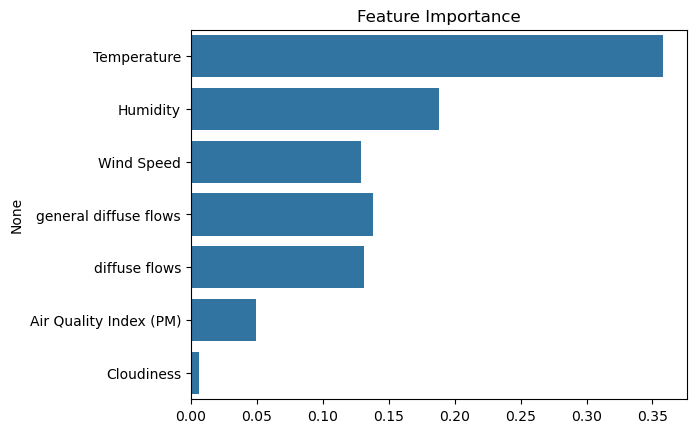

In [ ]:
importances = rr.feature_importances_
features = x.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()

# Hyper Parameter tuning with Grid search CV on Random forest and other boosting models

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define base model
rf = RandomForestRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'criterion': ['squared_error', 'absolute_error']
}

# Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, scoring='r2', verbose=2, n_jobs=-1)

# Fit grid search
grid_search.fit(x_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predictions
y_pred = best_rf.predict(x_test)
y_pred_tra = best_rf.predict(x_train)

# Scores
print("Best Parameters:", grid_search.best_params_)
print("Test R2 Score:", r2_score(y_test, y_pred))
print("Train R2 Score:", r2_score(y_train, y_pred_tra))


Fitting 3 folds for each of 36 candidates, totalling 108 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
import numpy as np
import xgboost as xgb  # Make sure xgboost is installed

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the base XGBoost model
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search with 3-fold CV
grid_search = GridSearchCV(estimator=xgbr,
                           param_grid=param_grid,
                           cv=3,
                           scoring='r2',
                           verbose=2,
                           n_jobs=-1)

# Fit
grid_search.fit(x_train, y_train)

# Best estimator
best_xgbr = grid_search.best_estimator_

# Predictions
y_pred = best_xgbr.predict(x_test)
y_pred_train = best_xgbr.predict(x_train)

# Scores
print("Best Parameters:", grid_search.best_params_)
print("Test R2 Score:", r2_score(y_test, y_pred))
print("Train R2 Score:", r2_score(y_train, y_pred_train))


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}
Test R2 Score: 0.610384900173496
Train R2 Score: 0.9190550680842221


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
import numpy as np
import lightgbm as lgb  # Make sure it's installed: pip install lightgbm

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the base LightGBM model
lgbm = lgb.LGBMRegressor(objective='regression', random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [-1, 10, 20],  # -1 means no limit
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search with 3-fold CV
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=3,
                           scoring='r2',
                           verbose=2,
                           n_jobs=-1)

# Fit
grid_search.fit(x_train, y_train)

# Best estimator
best_lgbm = grid_search.best_estimator_

# Predictions
y_pred = best_lgbm.predict(x_test)
y_pred_train = best_lgbm.predict(x_train)

# Scores
print("Best Parameters:", grid_search.best_params_)
print("Test R2 Score:", r2_score(y_test, y_pred))
print("Train R2 Score:", r2_score(y_train, y_pred_train))


Fitting 3 folds for each of 72 candidates, totalling 216 fits


c:\Users\shett\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\shett\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\shett\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\shett\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\shett\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000916 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1276
[LightGBM] [Info] Number of data points in the train set: 42066, number of used features: 7
[LightGBM] [Info] Start training from score 31058.113378
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': -1, 'n_estimators': 200, 'subsample': 0.8}
Test R2 Score: 0.5750561547783617
Train R2 Score: 0.6788245193134363


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define base model
rf = RandomForestRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'criterion': ['squared_error', 'absolute_error']
}

# Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, scoring='r2', verbose=2, n_jobs=-1)

# Fit grid search
grid_search.fit(x_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predictions
y_pred = best_rf.predict(x_test)
y_pred_tra = best_rf.predict(x_train)

# Scores
print("Best Parameters:", grid_search.best_params_)
print("Test R2 Score:", r2_score(y_test, y_pred))
print("Train R2 Score:", r2_score(y_train, y_pred_tra))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'criterion': 'squared_error', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Test R2 Score: 0.6401861653621057
Train R2 Score: 0.9497604822828659


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define base model
rf = RandomForestRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'criterion': ['poisson']
}

# Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, scoring='r2', verbose=2, n_jobs=-1)

# Fit grid search
grid_search.fit(x_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predictions
y_pred = best_rf.predict(x_test)
y_pred_tra = best_rf.predict(x_train)

# Scores
print("Best Parameters:", grid_search.best_params_)
print("Test R2 Score:", r2_score(y_test, y_pred))
print("Train R2 Score:", r2_score(y_train, y_pred_tra))


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'criterion': 'poisson', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Test R2 Score: 0.6393469436442665
Train R2 Score: 0.9497058156911411


### We decide RandomForest as the best model 
#### {'criterion': 'squared_error', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
#### Test R2 Score: 0.6401861653621057
#### Train R2 Score: 0.9497604822828659